In [1]:
import matplotlib
from bioinfo import *


## Árvore Filogenética
Foram dois os métodos abordados para contrução da árvore filogenética. O primeiro, o Clustal, um dos mais encontrados nas referências para tal procedimento e o segundo, uma integração da Distância Levenshtein (para criação da matriz distância)  seguido do método Neighbor Joining (para determinação dos clusters e pesos das ramificações).



### Clustal
O Clustal foi importado do pacote Biopython. Seu algoritmo rápido faz uso de aproximações para calcular as pontuações de similaridade entre sequências, que por sua vez produzem os alinhamentos em pares. O algoritmo funciona por meio do cálculo das pontuações de similaridade representando uma penalidade definida para as lacunas. Quanto mais semelhantes forem as sequências, quanto maior a pontuação, mais divergentes, menores os escores. Uma vez que as seqüências são pontuadas, um dendrograma é gerado através do UPGMA ou do método Neighbor Joining para representar a ordenação do alinhamento de múltiplas seqüências. Os conjuntos ordenados mais altos de sequências são alinhados primeiro, seguidos pelo resto em ordem decrescente. O algoritmo permite conjuntos de dados muito grandes e funciona rápido. 

In [2]:
species_list = gen_species(clean_data("./data/TRIM5ALPHA_complete_PopSet"))

In [3]:
aligned_data = clustalw_alignment("./data/TRIM5ALPHA_complete_PopSet")

In [4]:
print(aligned_data)

SingleLetterAlphabet() alignment with 17 rows and 2358 columns
ATGGCTTCTGGAATCCTGGTTAATGTAAAGGAGGAGGTGACCTG...TGA AY843506.1
ATGGCTTCTGGAATCCTGGTTAATGTAAAGGAGGAGGTGACCTG...TGA AY843510.1
ATGGCTTCTGGAATCCTGGTTAATGTAAAGGAGAAGGTGACCTG...TGA AY843509.1
ATGGCTTCTGGAATCCTGGTTAATGTAAAGGAGGAGGTGACCTG...TGA AY843513.1
ATGGCTTCTGGAATCCTGCTTAATGTAAAGGAGGAGGTGACCTG...TGA AY843504.1
ATGGCTTCTGGAATCCTGCTTAATGTAAAGGAGGAGGTGACCTG...TGA AY843505.1
ATGGCTTCTGGAATCCTGCTTAATGTAAAGGAGGAGGTGACCTG...TGA AY843514.1
ATGGCTTCTGGAATCCTGGTTAATATAAAGGAGGAGGTGACCTG...TGA AY843507.1
ATGGCTTCTGGAATCCTGGTTAATATAAAGGAGGAGGTGACCTG...TGA AY843508.1
ATGGCTTCCGAAATCCTGTTGAATATAAAGGAGGAGGTGACCTG...TGA AY843516.1
ATGGCTTCCGAAATCCTGGTGAATATAAAGGAGGAGGTGACCTG...TGA AY843520.1
ATGGCTTCCAAAATCCTGGTGAATATAAAGGAGGAGGTGACCTG...TGA AY843511.1
ATGGCTTCCAGAATCCTGGTGAATATAAAGGAGGAGGTAACCTG...TGA AY843512.1
ATGGCTTCCAGAATCCTGGTGAATATAAAGGAGGAGGTGACCTG...TGA AY843518.1
ATGGCTTCCAGAATCCTGATGAACATAAAGGAGGAGGTGACCTG...TGA AY843515.1
ATGGCTT

In [5]:
with open('trim5alpha_species_names.dnd', 'w'): pass
f = open("trim5alpha_species_names.dnd","w+")
f.write(tree_nodes_names("./data/TRIM5ALPHA_complete_PopSet.dnd",species_list))
f.close()

In [6]:
tree = Phylo.read("trim5alpha_species_names.dnd", "newick")

In [7]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.00213)
            Clade(branch_length=0.00617, name='Chlorocebus-aethiops')
            Clade(branch_length=0.00434, name='Papio-anubis')
        Clade(branch_length=0.00579)
            Clade(branch_length=0.01713)
                Clade(branch_length=0.00708)
                    Clade(branch_length=0.00539)
                        Clade(branch_length=0.0028, name='Pan-troglodytes')
                        Clade(branch_length=0.00393, name='Gorilla-gorilla')
                    Clade(branch_length=0.00061)
                        Clade(branch_length=0.01613, name='Symphalangus-syndactylus')
                        Clade(branch_length=0.00981, name='Pongo-pygmaeus')
                Clade(branch_length=0.06768)
                    Clade(branch_length=0.00215)
                        Clade(branch_length=0.03068, name='Alouatta-sara')
                        Clade(branch_length=0.0101)
                            Cla

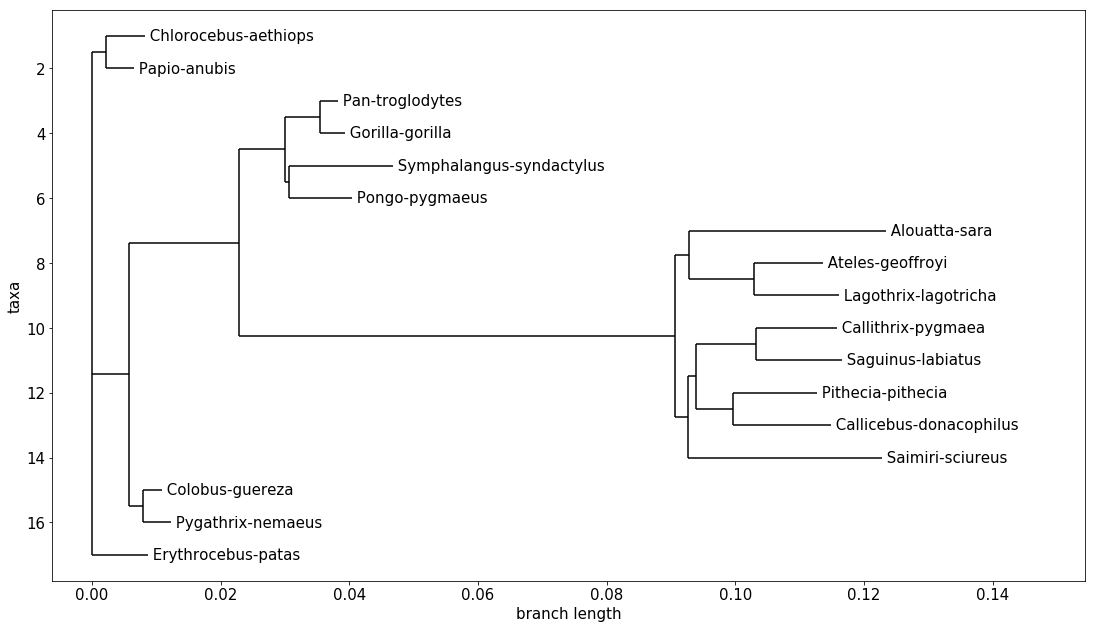

In [8]:
matplotlib.rc('font', size=15)
# set the size of the figure
Phylo.draw(tree,do_show=False)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('tree.png', dpi=100)


In [9]:
species_list

### Lavenshtein e Neighbor Joining
A distância Levenshtein é um método para comparação de duas "strings" (duas sequências de caracteres) é dada pelo número mínimo de operações necessárias para transformar uma string na outra. Onde é dado por "operações" a inserção, deleção ou substituição de um carácter. Ela é usada para contrução da matriz de distância das espácies, uma matriz 17 x 17, simétrica de diagonal nula, com as comparações duas a duas das distãncias entre espécies.

In [ ]:
# laven_dist_species(species_list,aligned_data)

In [11]:
laven = pd.read_csv('lavenshtein_distance.csv').drop('Unnamed: 0',1)

In [12]:
laven

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,14.0,57.0,37.0,151.0,100.0,95.0,81.0,83.0,384.0,386.0,406.0,237.0,238.0,226.0,239.0,247.0
1,14.0,0.0,57.0,39.0,152.0,103.0,97.0,83.0,87.0,384.0,388.0,410.0,241.0,242.0,228.0,241.0,251.0
2,57.0,57.0,0.0,56.0,164.0,110.0,106.0,92.0,96.0,382.0,385.0,407.0,240.0,236.0,225.0,238.0,249.0
3,37.0,39.0,56.0,0.0,151.0,101.0,95.0,83.0,89.0,383.0,381.0,409.0,242.0,239.0,228.0,242.0,250.0
4,151.0,152.0,164.0,151.0,0.0,71.0,86.0,95.0,97.0,426.0,430.0,454.0,298.0,297.0,294.0,303.0,316.0
5,100.0,103.0,110.0,101.0,71.0,0.0,39.0,41.0,43.0,399.0,403.0,429.0,256.0,258.0,248.0,259.0,271.0
6,95.0,97.0,106.0,95.0,86.0,39.0,0.0,41.0,44.0,400.0,403.0,425.0,256.0,258.0,247.0,260.0,270.0
7,81.0,83.0,92.0,83.0,95.0,41.0,41.0,0.0,15.0,381.0,384.0,412.0,241.0,241.0,231.0,238.0,254.0
8,83.0,87.0,96.0,89.0,97.0,43.0,44.0,15.0,0.0,385.0,387.0,416.0,245.0,245.0,237.0,245.0,257.0
9,384.0,384.0,382.0,383.0,426.0,399.0,400.0,381.0,385.0,0.0,54.0,127.0,243.0,247.0,247.0,239.0,264.0


In [13]:
dm = laven.values

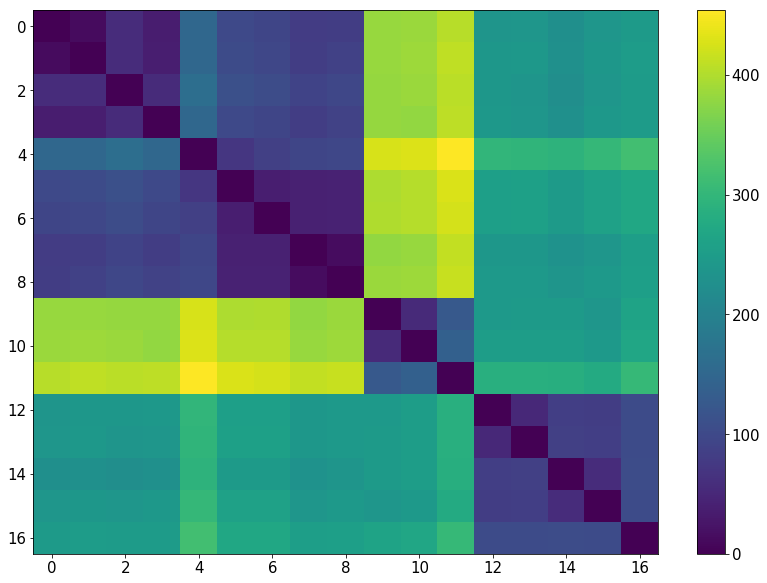

In [14]:
plt.subplots(figsize=(14, 10))
plt.imshow(dm, aspect='auto');
plt.colorbar()
plt.savefig('lavenshtein_distance.png')
plt.show()

In [15]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceMatrix

In [16]:
constructor = DistanceTreeConstructor()

dm_tmp = np.tril(dm).tolist()
    
for i in range(17):
    dm_tmp[i] = dm_tmp[i][:i+1]
    
dm2 = DistanceMatrix(species_name_list(species_list),dm_tmp)

In [17]:
dm2

DistanceMatrix(names=['Chlorocebus aethiops', 'Papio anubis', 'Pan troglodytes', 'Colobus guereza', 'Pygathrix nemaeus', 'Symphalangus syndactylus', 'Gorilla gorilla', 'Alouatta sara', 'Callithrix pygmaea', 'Pongo pygmaeus', 'Erythrocebus patas', 'Pithecia pithecia', 'Ateles geoffroyi', 'Saimiri sciureus', 'Saguinus labiatus', 'Callicebus donacophilus', 'Lagothrix lagotricha'], matrix=[[0], [14.0, 0], [57.0, 57.0, 0], [37.0, 39.0, 56.0, 0], [151.0, 152.0, 164.0, 151.0, 0], [100.0, 103.0, 110.0, 101.0, 71.0, 0], [95.0, 97.0, 106.0, 95.0, 86.0, 39.0, 0], [81.0, 83.0, 92.0, 83.0, 95.0, 41.0, 41.0, 0], [83.0, 87.0, 96.0, 89.0, 97.0, 43.0, 44.0, 15.0, 0], [384.0, 384.0, 382.0, 383.0, 426.0, 399.0, 400.0, 381.0, 385.0, 0], [386.0, 388.0, 385.0, 381.0, 430.0, 403.0, 403.0, 384.0, 387.0, 54.0, 0], [406.0, 410.0, 407.0, 409.0, 454.0, 429.0, 425.0, 412.0, 416.0, 127.0, 139.0, 0], [237.0, 241.0, 240.0, 242.0, 298.0, 256.0, 256.0, 241.0, 245.0, 243.0, 253.0, 286.0, 0], [238.0, 242.0, 236.0, 239.0,

In [18]:
laven_tree = constructor.nj(dm2)

In [19]:
root = laven_tree.clade

def clade_edit(root):
    if root.name[:5] == 'Inner':
        root.name = ''
    
    if root.is_terminal():
        pass
    else:
        for r in iter(root):
            clade_edit(r)

clade_edit(root)

In [20]:
print(laven_tree)

Tree(rooted=False)
    Clade(branch_length=0, name='')
        Clade(branch_length=7.74609375, name='')
            Clade(branch_length=31.63671875, name='')
                Clade(branch_length=137.4609375, name='')
                    Clade(branch_length=10.661458333333343, name='')
                        Clade(branch_length=59.359375, name='Lagothrix lagotricha')
                        Clade(branch_length=2.265625, name='')
                            Clade(branch_length=11.107954545454547, name='')
                                Clade(branch_length=32.781250000000014, name='Callicebus donacophilus')
                                Clade(branch_length=25.218749999999986, name='Saguinus labiatus')
                            Clade(branch_length=18.142045454545453, name='')
                                Clade(branch_length=26.211538461538467, name='Saimiri sciureus')
                                Clade(branch_length=25.788461538461533, name='Ateles geoffroyi')
                  

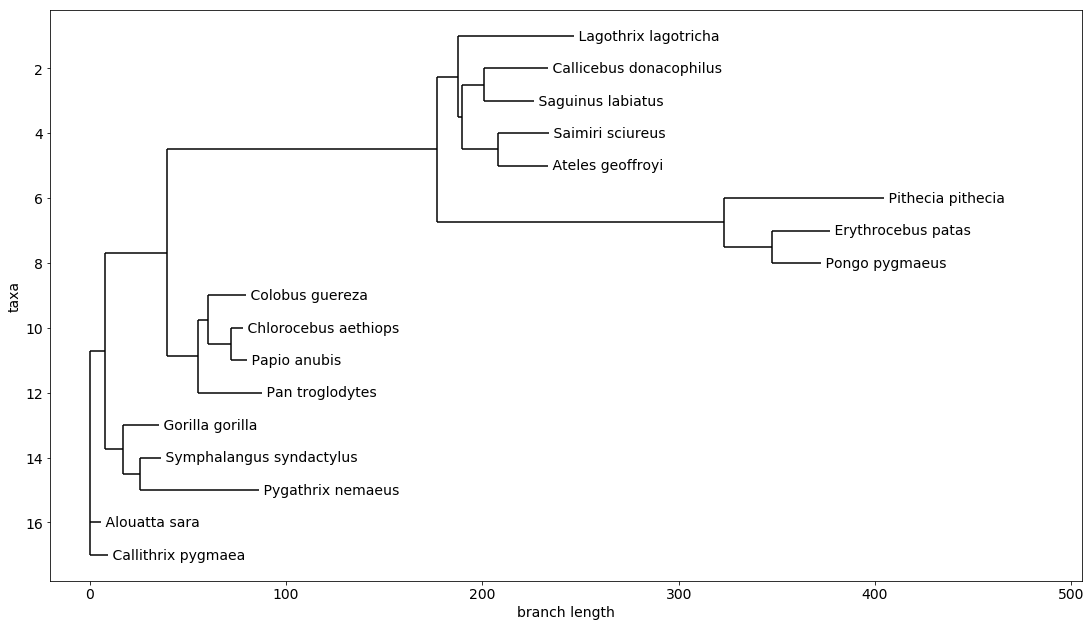

In [21]:
matplotlib.rc('font', size=14)
# set the size of the figure

Phylo.draw(laven_tree,do_show=False)
fig = matplotlib.pyplot.gcf()

fig.set_size_inches(18.5, 10.5)
fig.savefig('laven_tree.png', dpi=100)